In [1]:
#Importing Libraries 
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
import urllib.request

In [2]:
#Function to load Image from website
def read_file(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return img 

In [13]:
filename = url = input("Enter URL: ")
url_response = urllib.request.urlopen(url)
img_array = np.array(bytearray(url_response.read()), dtype = np.uint8)
img = cv2.imdecode(img_array, 1)
img = cv2.resize(img, (600,600))
cv2.imshow('cartoon image',img)
cv2.waitKey()

org_img = np.copy(img)

Enter URL: https://i.pinimg.com/originals/5a/e5/2b/5ae52babc256e140879960005f020e78.jpg


In [14]:
#Function to Create Edge Mask 
def edge_mask(img, line_size, blur_value):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)
    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
    return edges


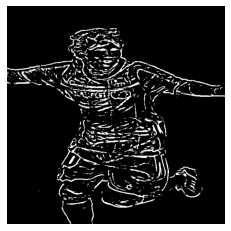

In [15]:
line_size, blur_value = 7,7
edges = edge_mask(img, line_size, blur_value)
plt.imshow(edges, cmap= "binary")
plt.axis('off')
plt.show()

In [16]:
#Function to Reduce Color Palette
def color_quantization(img, k):
    data = np.float32(img).reshape((-1,3))
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    return result

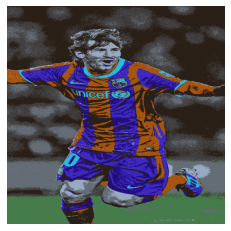

In [17]:
img = color_quantization(img, k=9)
plt.imshow(img)
plt.axis('off')
plt.show()

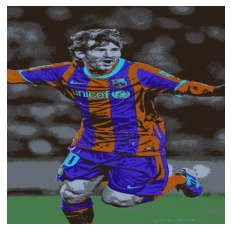

In [18]:
#Reduce the noise
blurred = cv2.bilateralFilter(img, d = 3, sigmaColor= 200, sigmaSpace= 200)
plt.imshow(blurred)
plt.axis('off')
plt.show()

In [19]:
#Combine Edge Mask with the Quantiz Image
def cartoon():
    c = cv2.bitwise_and(blurred, blurred, mask= edges)
    
    plt.imshow(org_img)
    plt.title("Original Image")
    plt.axis('off')
    plt.show()
    
    plt.imshow(c)
    plt.title("Cartoonified Image")
    plt.axis('off')
    plt.show()
    
    

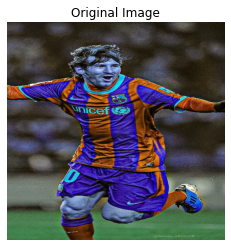

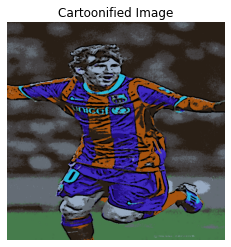

In [20]:
#Call The function    
cartoon()